# Distribution Networks 04 - Location Allocation problem
*This notebook illustrates methods to solve the location-allocation problem of a supply chain network.
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

### Set AS IS scenario parameters

In [2]:
# all cost are expressed using tuples where the first element is a mean, and the second a standard deviation of the cost 
# per year

# variable costs
direct_labor_cost_asis_dist=(1, 0.5) 
logistic_cost_asis_dist=(0.3, 0.1) 
operational_cost_asis_dist=(0.4, 0.05) 

# fixed costs
depreciation_cost_as_is_dist = (10000,100)
fixed_cost_asis_dist = (1e5,1e3) 

productivity_asis = 1e6 *np.ones(10)


### Set TO-BE scenario parameters

In [3]:
#The tobe scenario uses lists with as many elements as plants in the TOBE network

#investment costs
investment_cost_plant_1 = (0.5e6,1e2) 
investment_cost_plant_2 = (1e6,1e2) 
investment_cost_tobe_dist = [investment_cost_plant_1, investment_cost_plant_2]

#logistic costs
logistic_cost_tobe_plant_1=(0.4, 0.05) 
logistic_cost_tobe_plant_2=(0.3,0.05) 
logistic_cost_tobe_dist = [logistic_cost_tobe_plant_1 , logistic_cost_tobe_plant_2]

#operational cost
operational_cost_tobe_dist_plant_1=(0.3,0.3)
operational_cost_tobe_dist_plant_2=(0.1,0.1)
operational_cost_tobe_dist = [operational_cost_tobe_dist_plant_1, operational_cost_tobe_dist_plant_2] 


#direct labour costs
direct_labor_cost_tobe_dist_plant_1=(0.9,0.1)
direct_labor_cost_tobe_dist_plant_2=(0.9,0.5)
direct_labor_cost_tobe_dist=[direct_labor_cost_tobe_dist_plant_1,direct_labor_cost_tobe_dist_plant_2]


#fixed costs
fixed_cost_tobe_dist_plant_1 = (8e4,1e3)
fixed_cost_tobe_dist_plant_2 = (7e4,2e3)
fixed_cost_tobe_dist=[fixed_cost_tobe_dist_plant_1, fixed_cost_tobe_dist_plant_2]

#depreciation costs
depreciation_cost_tobe_dist_plant_1 = (5e4,0) 
depreciation_cost_tobe_dist_plant_2 = (6e4, 0)
depreciation_cost_tobe_dist = [depreciation_cost_tobe_dist_plant_1, depreciation_cost_tobe_dist_plant_2]

#############################################################################################
######################################## produttivita' ######################################
#############################################################################################


productivity_plant_1 = [400000, 450000, 0.5e6, 0.5e6, 0.5e6, 0.5e6, 0.5e6, 0.55e6, 0.6e6, 0.6e6]
productivity_plant_2 = [400000, 450000, 0.5e6, 0.5e6, 0.5e6, 0.5e6, 0.5e6, 0.55e6, 0.6e6, 0.6e6] 
productivity_tobe = [productivity_plant_1, productivity_plant_2]


### Set simulation parameters

In [4]:
years = 10
num_iter = 100

### Import cost model definition

In [5]:
from analogistics.supply_chain.P6_placement_problem.locationAllocationProblem import totalCostASIS, totalCostTOBE
   


### Import simulation engines

In [6]:
from analogistics.supply_chain.P6_placement_problem.locationAllocationProblem import runSimulation, runSimulationNoVariance


### Run montecarlo simulation

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


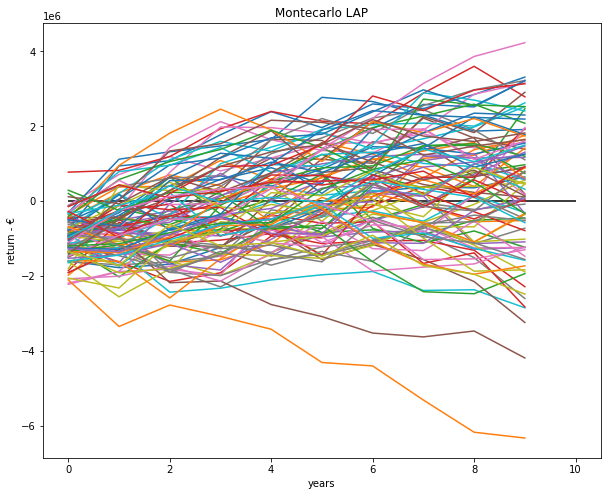

In [7]:
#Run montecarlo simulation
fig_result = runSimulation(num_iter,
                  years,
                  productivity_asis,
                  logistic_cost_asis_dist,
                  operational_cost_asis_dist,
                  direct_labor_cost_asis_dist,
                  depreciation_cost_as_is_dist,
                  fixed_cost_asis_dist,
                  productivity_tobe,
                  logistic_cost_tobe_dist,
                  operational_cost_tobe_dist,
                  direct_labor_cost_tobe_dist,
                  depreciation_cost_tobe_dist,
                  investment_cost_tobe_dist,
                  fixed_cost_tobe_dist)
fig_result.show()

### Run static simulation

df_conto_economico_tobe


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


,year,personnell cost,logistics cost,operational cost,depreciation cost,fixed cost
0,0,720000.0,280000.0,160000.0,110000.0,150000.0
1,1,810000.0,315000.0,180000.0,110000.0,150000.0
2,2,900000.0,350000.0,200000.0,110000.0,150000.0
3,3,900000.0,350000.0,200000.0,110000.0,150000.0
4,4,900000.0,350000.0,200000.0,110000.0,150000.0
5,5,900000.0,350000.0,200000.0,110000.0,150000.0
6,6,900000.0,350000.0,200000.0,110000.0,150000.0
7,7,990000.0,385000.0,220000.0,110000.0,150000.0
8,8,1080000.0,420000.0,240000.0,110000.0,150000.0
9,9,1080000.0,420000.0,240000.0,110000.0,150000.0


df_conto_economico_tobe_part


,year,personnell cost,logistics cost,operational cost,depreciation cost,fixed cost
0,0.000000,0.72,0.280,0.16,0.11,0.15
1,0.000001,0.81,0.315,0.18,0.11,0.15
2,0.000002,0.90,0.350,0.20,0.11,0.15
3,0.000003,0.90,0.350,0.20,0.11,0.15
4,0.000004,0.90,0.350,0.20,0.11,0.15
5,0.000005,0.90,0.350,0.20,0.11,0.15
6,0.000006,0.90,0.350,0.20,0.11,0.15
7,0.000007,0.99,0.385,0.22,0.11,0.15
8,0.000008,1.08,0.420,0.24,0.11,0.15
9,0.000009,1.08,0.420,0.24,0.11,0.15


df_conto_economico_asis


,year,personnell cost,logistics cost,operational cost,depreciation cost,fixed cost
0,0,1000000.0,300000.0,400000.0,10000.0,100000.0
1,1,1000000.0,300000.0,400000.0,10000.0,100000.0
2,2,1000000.0,300000.0,400000.0,10000.0,100000.0
3,3,1000000.0,300000.0,400000.0,10000.0,100000.0
4,4,1000000.0,300000.0,400000.0,10000.0,100000.0
5,5,1000000.0,300000.0,400000.0,10000.0,100000.0
6,6,1000000.0,300000.0,400000.0,10000.0,100000.0
7,7,1000000.0,300000.0,400000.0,10000.0,100000.0
8,8,1000000.0,300000.0,400000.0,10000.0,100000.0
9,9,1000000.0,300000.0,400000.0,10000.0,100000.0


df_conto_economico_asis_part


,year,personnell cost,logistics cost,operational cost,depreciation cost,fixed cost
0,0.000000,1.0,0.3,0.4,0.01,0.1
1,0.000001,1.0,0.3,0.4,0.01,0.1
2,0.000002,1.0,0.3,0.4,0.01,0.1
3,0.000003,1.0,0.3,0.4,0.01,0.1
4,0.000004,1.0,0.3,0.4,0.01,0.1
5,0.000005,1.0,0.3,0.4,0.01,0.1
6,0.000006,1.0,0.3,0.4,0.01,0.1
7,0.000007,1.0,0.3,0.4,0.01,0.1
8,0.000008,1.0,0.3,0.4,0.01,0.1
9,0.000009,1.0,0.3,0.4,0.01,0.1


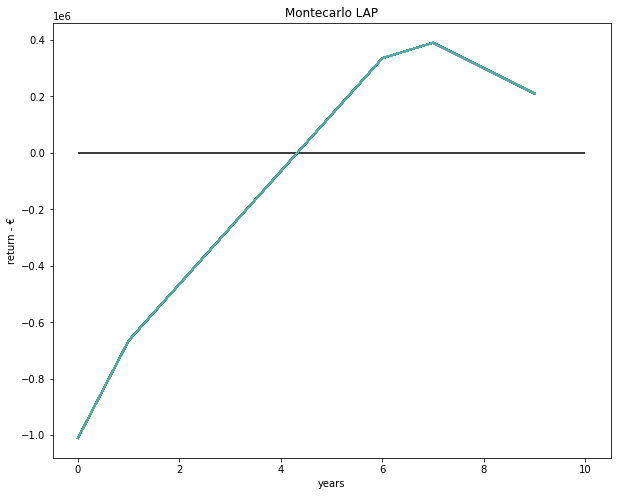

In [8]:
#Run static simulation
fig_result, df_results = runSimulationNoVariance(num_iter,
                  years,
                  productivity_asis,
                  logistic_cost_asis_dist,
                  operational_cost_asis_dist,
                  direct_labor_cost_asis_dist,
                  depreciation_cost_as_is_dist,
                  fixed_cost_asis_dist,
                  productivity_tobe,
                  logistic_cost_tobe_dist,
                  operational_cost_tobe_dist,
                  direct_labor_cost_tobe_dist,
                  depreciation_cost_tobe_dist,
                  investment_cost_tobe_dist,
                  fixed_cost_tobe_dist)
fig_result.show()


for key in df_results.keys():
    print(key)
    display(HTML(df_results[key].to_html()))